# Лабораторная работа №1. Кластерный анализ

### 0 Подготовка библиотек

Перед началом работы необходимо обновить библиотеку matplotlib до версии 3.0.0. 
<br>
<br>
**Обновление библиотеки через командную строку:**
1. Завершите выполнение текущей команды (если оно было запущено)
2. Введите в командной строке: pip install --upgrade matplotlib
3. Подождите, пока библиотека обновится
4. После окончания загрузки обновленной версии библиотеки введите: ipython notebook
<br>

**Обновление библиотеки через Anaconda:**
AnacondaNavigator -> Environments -> ищем matplotlib -> mark for update -> apply

### 1. Обработка данных

Импортируем необходимые библиотеки

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

%matplotlib inline 
# авто вывод графиков (отпадает необходимость писать plt.show())

Указываем названия признаков

In [26]:
features = ['X1', 'X8', 'X11', 'X12', 'X18'] #список переменных
f_len = len(features) #в переменную f_len записываем кол-во признаков

Считываем данные

In [27]:
#считываем данные из data_lab1.xlsx (файл, который содержит ВСЕ строки и ВСЕ 46 признаков)
#метод loc выводит все строки (:) и столбцы с названиями, указанными в переменной features 

data = pd.read_excel('data_lab1.xlsx').loc[:, features] 
data.head() # метод head() выводит первые 5 записей 

,X1,X8,X11,X12,X18
Абдулинский,53.69,93.1,42.3,33.9,0.2
Адамовский,62.31,23.4,63.6,16.7,3.6
Акбулакский,62.71,23.6,43.7,16.8,3.9
Александровский,61.69,46.7,41.5,10.4,4.2
Асекеевский,59.44,44.0,79.3,26.4,4.1


In [28]:
data.shape #метод shape возвращает размерность матрицы объект-свойство

(47, 5)

Стандартизируем данные

In [29]:
index = data.index #записываем в переменную index названия строк исходной матрицы
columns = data.columns #записываем в переменную columns названия столбцов исходной матрицы

#стандартизируем данные: вычитаем среднее и делим на стандартное отклонение
scaled = (data - data.mean(axis=0))/data.std() 

#создаем датафрейм из scaled со столбцами columns и индексами index
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,X1,X8,X11,X12,X18
Абдулинский,-2.579260,2.914943,-0.481479,1.817417,-2.376303
Адамовский,0.247940,-1.084664,0.568420,-0.153341,-0.542729
Акбулакский,0.379133,-1.073188,-0.412472,-0.141883,-0.380943
Александровский,0.044592,0.252364,-0.520912,-0.875188,-0.219157
Асекеевский,-0.693367,0.097429,1.342290,0.958075,-0.273085


### 2. Построение дендрограмм

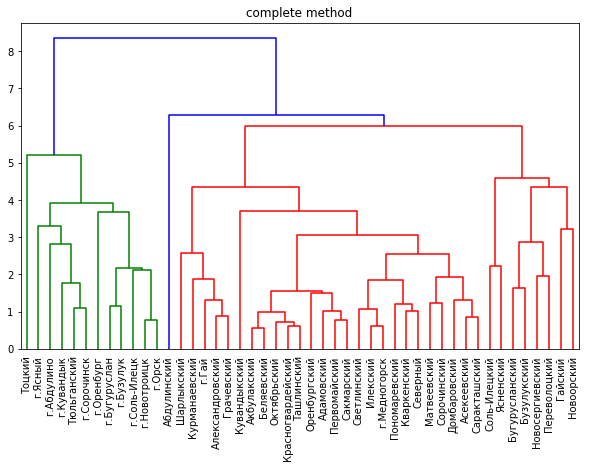

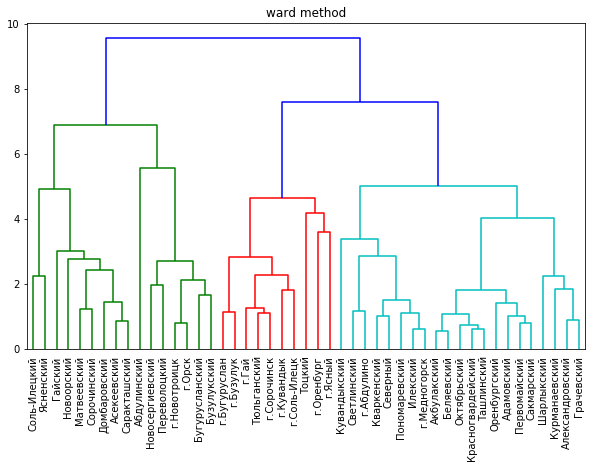

In [30]:
methods = ['complete', 'ward'] 
q = [6.2,7]
i = 0

#для каждого из методов в methods проводим кластеризацию и строим дендрограмму
for method in methods:
    #проводим кластеризацию
    Z = hierarchy.linkage(scaled_data, method=method)

    #строим дендрограмму 
    plt.figure(figsize=(10,6))
    hierarchy.dendrogram(Z, color_threshold=q[i], labels=scaled_data.index, leaf_font_size=10)
    plt.title('{} method'.format(method))
    i = i+1
    # Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта, 
    #count_sort=True - упорядочивает кластеры от минимального числа элементов в них 
    plt.title('{} method'.format(method))

In [31]:
#проводим кластеризацию методом K-means, указав в n_clusters выбранное число кластеров
# (n_clusters - число кластеров, random_state - псевдослучайное число для выбора псевдослучайного центра)
kmeans = KMeans(n_clusters=3, random_state=17) 
kmeans.fit(scaled_data); 

In [32]:
#добавляем в датафрейм со стандартизированными данными столбец с номерами кластеров, полученными в методе k-means
scaled_data['kmeans'] = kmeans.labels_

In [33]:
#смотрим, какое разбиение получилось

cluster_dict={} # задаем пустой словарь

for i in range(3): # Проходимся в цикле от 0 до 2 
    #записываем в словарь состав кластеров
    clust_list = scaled_data[scaled_data['kmeans']==i][features].index.values 
    print('Состав кластера {}: {}' 
          .format(i, clust_list))      

Состав кластера 0: ['Курманаевский' 'Тоцкий' 'г.Бугуруслан' 'г.Бузулук' 'г.Гай' 'г.Кувандык'
 'г.Оренбург' 'г.Соль-Илецк' 'г.Сорочинск' 'г.Ясный']
Состав кластера 1: ['Абдулинский' 'Асекеевский' 'Бугурусланский' 'Бузулукский' 'Кваркенский'
 'Новоорский' 'Новосергиевский' 'Переволоцкий' 'Саракташский'
 'г.Новотроицк' 'г.Орск']
Состав кластера 2: ['Адамовский' 'Акбулакский' 'Александровский' 'Беляевский' 'Гайский'
 'Грачевский' 'Домбаровский' 'Илекский' 'Красногвардейский' 'Кувандыкский'
 'Матвеевский' 'Октябрьский' 'Оренбургский' 'Первомайский' 'Пономаревский'
 'Сакмарский' 'Светлинский' 'Северный' 'Соль-Илецкий' 'Сорочинский'
 'Ташлинский' 'Тюльганский' 'Шарлыкский' 'Ясненский' 'г.Абдулино'
 'г.Медногорск']




Если видим, что такое разбиение нас не устраивает (выброс образует целый кластер, например), то необходимо удалить выбросы и провести кластеризацию заново.

In [34]:
#если такое разбиение нас устраивает, продолжаем кластеризацию

### 3. Проведение кластеризации тремя методами

Т.к. метод hierarchy.linkage не возвращает метки(номера) кластеров, то необходимо провести кластеризацию с помощию AgglomerativeClustering
<br>
<br>
**n_clusters** - кол-во кластеров, которое мы выбираем самомтоятельно
<br>
**linkage** - выбранные метод

In [35]:
CLUSTER_METHODS = ["complete", "ward", "kmeans"]

#для каждого из методов выбрать кол-во кластеров 
N_CLUSTERS = {
    "complete" : 3,
    "ward"     : 3,
    "kmeans"  : 3,
}

In [36]:
#проводим кластеризацию методом полных связей

# создаем объект класса AgglomerativeClustering, указываем для этого объекта значения параметров
# т.е. n_clusters - кол-во кластеров, linkage - метод кластеризации
# называем созданный объект complete

complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')

#методы, которые можно указывать в linkage: “ward”, “complete”, “average”

# с помощью метода .fit "настраиваем" объект под наши данные, 
# т.е. проводим кластеризацию наших данных с параметрами, которые мы указали при создании complete 
complete.fit(scaled_data);

In [37]:
#проводим кластеризацию методом Уорда
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled_data);

Для проведения кластеризации методом K-means необходимо воспользоваться KMeans из sklearn.cluster
<br>
<br>
**random_state** - параметр, принимающий любое числовое значение. Необходим для воспроизведения результатов

In [38]:
#проводим кластеризацию методом K-means
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'], random_state=17)
kmeans.fit(scaled_data);

Для каждого из созданных шагом ранее объектов с помощью атрибута **.labels_** можно получить метки кластеров для каждой из проведенных кластеризаций.
<br>
**complete.labels_** - для метода полных связей
<br>
**ward.labels_** - для метода Уорда
<br>
**kmeans.labels_** - для K-Means

### 4. Работа с метками кластеров. Построение графиков средних значений для каждого кластера по каждому признаку

In [39]:
#добавляем в исходный датафрейм столбцы с метками кластеров
scaled_data['complete'] = complete.labels_
scaled_data['ward'] = ward.labels_
scaled_data['kmeans'] = kmeans.labels_

print(scaled_data)

                         X1        X8       X11       X12       X18  kmeans  \
Абдулинский       -2.579260  2.914943 -0.481479  1.817417 -2.376303       2   
Адамовский         0.247940 -1.084664  0.568420 -0.153341 -0.542729       0   
Акбулакский        0.379133 -1.073188 -0.412472 -0.141883 -0.380943       0   
Александровский    0.044592  0.252364 -0.520912 -0.875188 -0.219157       0   
Асекеевский       -0.693367  0.097429  1.342290  0.958075 -0.273085       2   
Беляевский         0.067550 -0.946945 -0.787084 -0.290836 -0.219157       0   
Бугурусланский    -0.371945 -0.860870 -0.328677  2.092407  0.320130       2   
Бузулукский       -0.798321  0.487635 -0.653998  1.359101  0.535844       2   
Гайский           -0.696647 -1.905244  1.928854  1.072654  0.158344       0   
Грачевский        -0.499858  0.281055 -0.570203 -1.299130  0.320130       0   
Домбаровский       0.264339 -0.275561  1.391581  0.385180  0.266201       0   
Илекский          -0.545775  0.981130  0.361398 -0.4

In [40]:
#ниже объявлена функция, которая возвращает список из средних по каждому столбцу.
#т.е. она формирует массив из средних для метода method c кол-вом кластеров n_clust

def mean_df(method, n_clust):
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust): #номер кластера
        tmp = [] #список для средних по каждому признаку
        for j in range(f_len):
            tmp.append(scaled_data[scaled_data[method] == n].iloc[:, j].mean())
        tmp.append(scaled_data[scaled_data[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))
    return mean_data

Формируем датафрейм из средних значений для каждого кластера по каждому признаку с использованием функции mean_df, описанный выше

In [41]:
columns = features + ['count']

# Создаем словарь из списком по имени means, в котором имена ключей будут Имя_Метода,
# а каждому ключу будет соответствовать датафрейм из средних значений по каждому кластеру

means = {}
dfs = []

path = "means.xlsx" # создаем переменную path, которой присваиваем название файла для записи средних
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # вызываем метод ExcelWriter библиотеки pandas 


for method, n in N_CLUSTERS.items():
    #Заполняем словарь
    means[method] = pd.DataFrame(
        mean_df(method, n), #ищем среднее значение признаков с помощью функции mean_df
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )

    #запись средних значений в в файл means на разные листв
    #файл создается в той же директории, где лежит ноутбук с кодом
    means[method].to_excel(writer, sheet_name = '{} means'.format(method))

In [42]:
#Получился словарь means с ключами 'complete', 'ward', 'kmeans'
#Каждому ключу соответствует датафрейм из 6 столбцов и стольких строк, 
#сколько кластеров в данном конкретном методе

for method in CLUSTER_METHODS:
    print(means[method])

                  X1        X8       X11       X12       X18  count
complete_0  0.304900 -0.132677 -0.334263 -0.523049  0.289570   30.0
complete_1 -0.376974 -0.021928  0.652872  0.994740 -0.265895   15.0
complete_2 -1.746187  2.154616  0.117407  0.385180 -2.349338    2.0
              X1        X8       X11       X12       X18  count
ward_0 -0.262662 -0.304253  0.278392 -0.497078 -0.348586   25.0
ward_1  1.136770 -0.028814 -0.990163 -0.255316  1.058952   10.0
ward_2 -0.400097  0.657872  0.245153  1.248342 -0.156240   12.0
                X1        X8       X11       X12       X18  count
kmeans_0 -0.242392 -0.303149  0.321207 -0.463145 -0.324940   26.0
kmeans_1  1.136770 -0.028814 -0.990163 -0.255316  1.058952   10.0
kmeans_2 -0.460500  0.742729  0.140932  1.326811 -0.194644   11.0


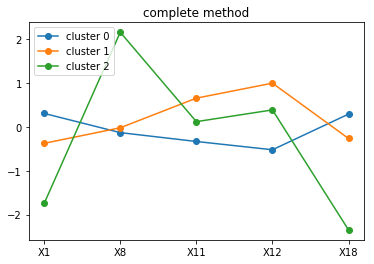

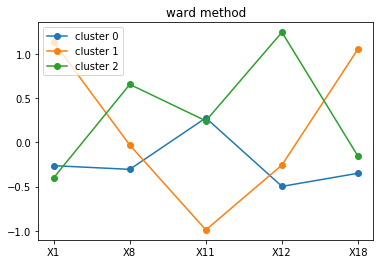

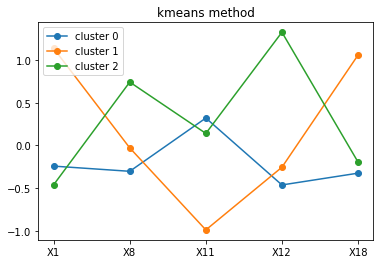

In [43]:
#строим графики средних значений признаков по каждому кластеру

#цикл выполняется для каждого элемента из списка CLUSTER_METHODS т.е. для 'complete', 'ward', 'kmeans'
for method in CLUSTER_METHODS:
    # в cur_mean записываются средние для текущего метода (по которому проходим на данной итерации цикла)
    cur_mean = means[method] 
    plt.figure(figsize=(6,4)) #формируем область для построения графиков под каждый из методов
    for n in range(cur_mean.shape[0]): #для каждого кластера из данного метода
        
        #plt.plot - для каждого кластера из данного метода строится обычный линейный график, где 
        #x=features (т.е. названия признаков) 
        #y=cur_mean.iloc[n, :-1] - т.е. n-ая строка средних 
        #(n - номер кластера, для которого на данной итерации цикла строим график) 
        #берем строку без последнего столбца (там count лежит, он нам не нужен), т.е. пишем ":-1" в методе iloc
        
        plt.plot(features, cur_mean.iloc[n, :-1].values, marker='o', label='cluster {}'.format(n))
    plt.legend(loc = 'upper left') #делаем легенду графиа
    plt.title('{} method'.format(cur_mean.index[0][:-2])) #название графика

Создадим словарь cluster_dict из списков, в котором ключами будут **Название Метода__Номер Кластера**
<br>
<br>
Например, **complete_0** - элемент словаря, по которому можно получить строки, соответствующие кластеру 0 для метода полных связей

In [44]:
cluster_dict = {}


path = "members.xlsx" # создаем переменную path, которой присваиваем название файла для записи объектов кластеров
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # вызываем метод ExcelWriter библиотеки pandas 

for method, n in N_CLUSTERS.items():
    print('{} method\n'.format(method)) # выводим заголовки методов по шаблону 
    dfs = []  
    for i in range(n): # для каждого кластера проходимся по объектам и записываем их в словарь 
        cluster_dict['{}_{}'.format(method, i)] = \
           scaled_data[scaled_data[method]==i][features]
        
        #запись членов кластеров в файл members на лист с именем Метод_НомерКластера
        #файл создается в той же директории, где лежит ноутбук с кодом
        cluster_dict['{}_{}'.format(method, i)]\
        .to_excel(writer, sheet_name = '{}_{}'.format(method, i))
        
        print ('Состав кластера {}: {}'
              .format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')
    #print (cluster_dict)

complete method

Состав кластера 0: ['Адамовский' 'Акбулакский' 'Александровский' 'Беляевский' 'Грачевский'
 'Илекский' 'Кваркенский' 'Красногвардейский' 'Курманаевский'
 'Октябрьский' 'Оренбургский' 'Первомайский' 'Пономаревский' 'Сакмарский'
 'Светлинский' 'Северный' 'Ташлинский' 'Тоцкий' 'Тюльганский' 'Шарлыкский'
 'г.Абдулино' 'г.Бугуруслан' 'г.Бузулук' 'г.Гай' 'г.Кувандык'
 'г.Медногорск' 'г.Оренбург' 'г.Соль-Илецк' 'г.Сорочинск' 'г.Ясный']
Состав кластера 1: ['Асекеевский' 'Бугурусланский' 'Бузулукский' 'Гайский' 'Домбаровский'
 'Матвеевский' 'Новоорский' 'Новосергиевский' 'Переволоцкий'
 'Саракташский' 'Соль-Илецкий' 'Сорочинский' 'Ясненский' 'г.Новотроицк'
 'г.Орск']
Состав кластера 2: ['Абдулинский' 'Кувандыкский']


ward method

Состав кластера 0: ['Адамовский' 'Акбулакский' 'Александровский' 'Беляевский' 'Гайский'
 'Грачевский' 'Илекский' 'Красногвардейский' 'Кувандыкский' 'Матвеевский'
 'Октябрьский' 'Оренбургский' 'Первомайский' 'Пономаревский' 'Сакмарский'
 'Светлинский' 

### 5. Функционал ошибки

In [45]:
def Q(method_num, mean_data_row):
    q = 0 # Обнуляем функционал качества разбиения 
    for i in range(len(method_num)): # проходимся по каждому элементу кластера
        
        # Во временную переменную записываем промежуточные значения суммы, чтобы потом добавлять их к Q
        tmp = 0
        for j, feature in zip(range(len(features)), features):
            
            #проходя по каждому признаку, считаем сумму квадратов расстояний от значения объекта до центра кластера
            tmp = tmp + (method_num.iloc[i, j] - mean_data_row[feature][0])**2 
            
            # Прибавляем к Q
        q = q + tmp
    #возвращаем конечную сумму
    return q

In [46]:
#создадим общий датафрейм для всех средних значений признаков по каждому кластеру 

mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data.append(means[method])
    
#выведим получившийся датафрейм
mean_data

,X1,X8,X11,X12,X18,count
complete_0,0.304900,-0.132677,-0.334263,-0.523049,0.289570,30.0
complete_1,-0.376974,-0.021928,0.652872,0.994740,-0.265895,15.0
complete_2,-1.746187,2.154616,0.117407,0.385180,-2.349338,2.0
ward_0,-0.262662,-0.304253,0.278392,-0.497078,-0.348586,25.0
ward_1,1.136770,-0.028814,-0.990163,-0.255316,1.058952,10.0
ward_2,-0.400097,0.657872,0.245153,1.248342,-0.156240,12.0
kmeans_0,-0.242392,-0.303149,0.321207,-0.463145,-0.324940,26.0
kmeans_1,1.136770,-0.028814,-0.990163,-0.255316,1.058952,10.0
kmeans_2,-0.460500,0.742729,0.140932,1.326811,-0.194644,11.0


In [47]:
#создаем пустой словарь, в который будем записывать значения функционалов ошибки для каждого метода
Q_dict = {}

#k - номер строки в датафрейме mean_data (выведен выше)
k = 0

for method, n in N_CLUSTERS.items():
    #временная переменная, нужна для суммирования функционала ошибки для каждого кластера в рамках одного метода
    tmp = 0
    #для каждого кластера (их всего n) в данном методе method выполняются действия в теле цикла
    for i in range(n):
        #в переменную tmp прибавляется значение Q для текущего номера кластера i (изменяется от 0 до n-1)
        #в Q передаем в качестве первого аргумента - датафрейм, содержащий члены текущего кластера
        #в качестве второго аргумента - строку из mean_data с индексом k (там записаны средние значения для данного кластера i)
        tmp += Q(cluster_dict['{}_{}'.format(method, i)], pd.DataFrame(mean_data.iloc[k]).T)
        #увеличиваем k на 1 (чтобы перейти к следующей строке mean_data)
        k += 1   
    #после того, как прошли по всем кластерам в рамках метода method и просуммировали функционалы ошибки в переменной tmp, запишем результирующую сумму в словарь
    Q_dict['Q_{}'.format(method)] = round(tmp, 3)

In [48]:
Q_dict

{'Q_complete': 161.426, 'Q_ward': 153.379, 'Q_kmeans': 152.077}